In [7]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd
import gc
import torch
from skimage.color import rgb2lab, lab2rgb

In [2]:
ab_path = "../data/archive/ab/ab/ab1.npy"
l_path = "../data/archive/l/gray_scale.npy"

In [8]:
ab_data = np.load(ab_path)[0:5000]
L_data = np.load(l_path)[0:5000]
dataset = (L_data, ab_data)
gc.collect()

29

We have to perform the conversion to RGB in order to explore our data with matplotlib.

In [9]:
def lab_to_rgb(L, ab):
    """
    Takes an image or a batch of images and converts from LAB space to RGB
    """
    L = L  * 100
    ab = (ab - 0.5) * 128 * 2
    Lab = torch.cat([L, ab], dim=2).numpy()
    rgb_imgs = []
    for img in Lab:
        img_rgb = lab2rgb(img)
        rgb_imgs.append(img_rgb)
    return np.stack(rgb_imgs, axis=0)

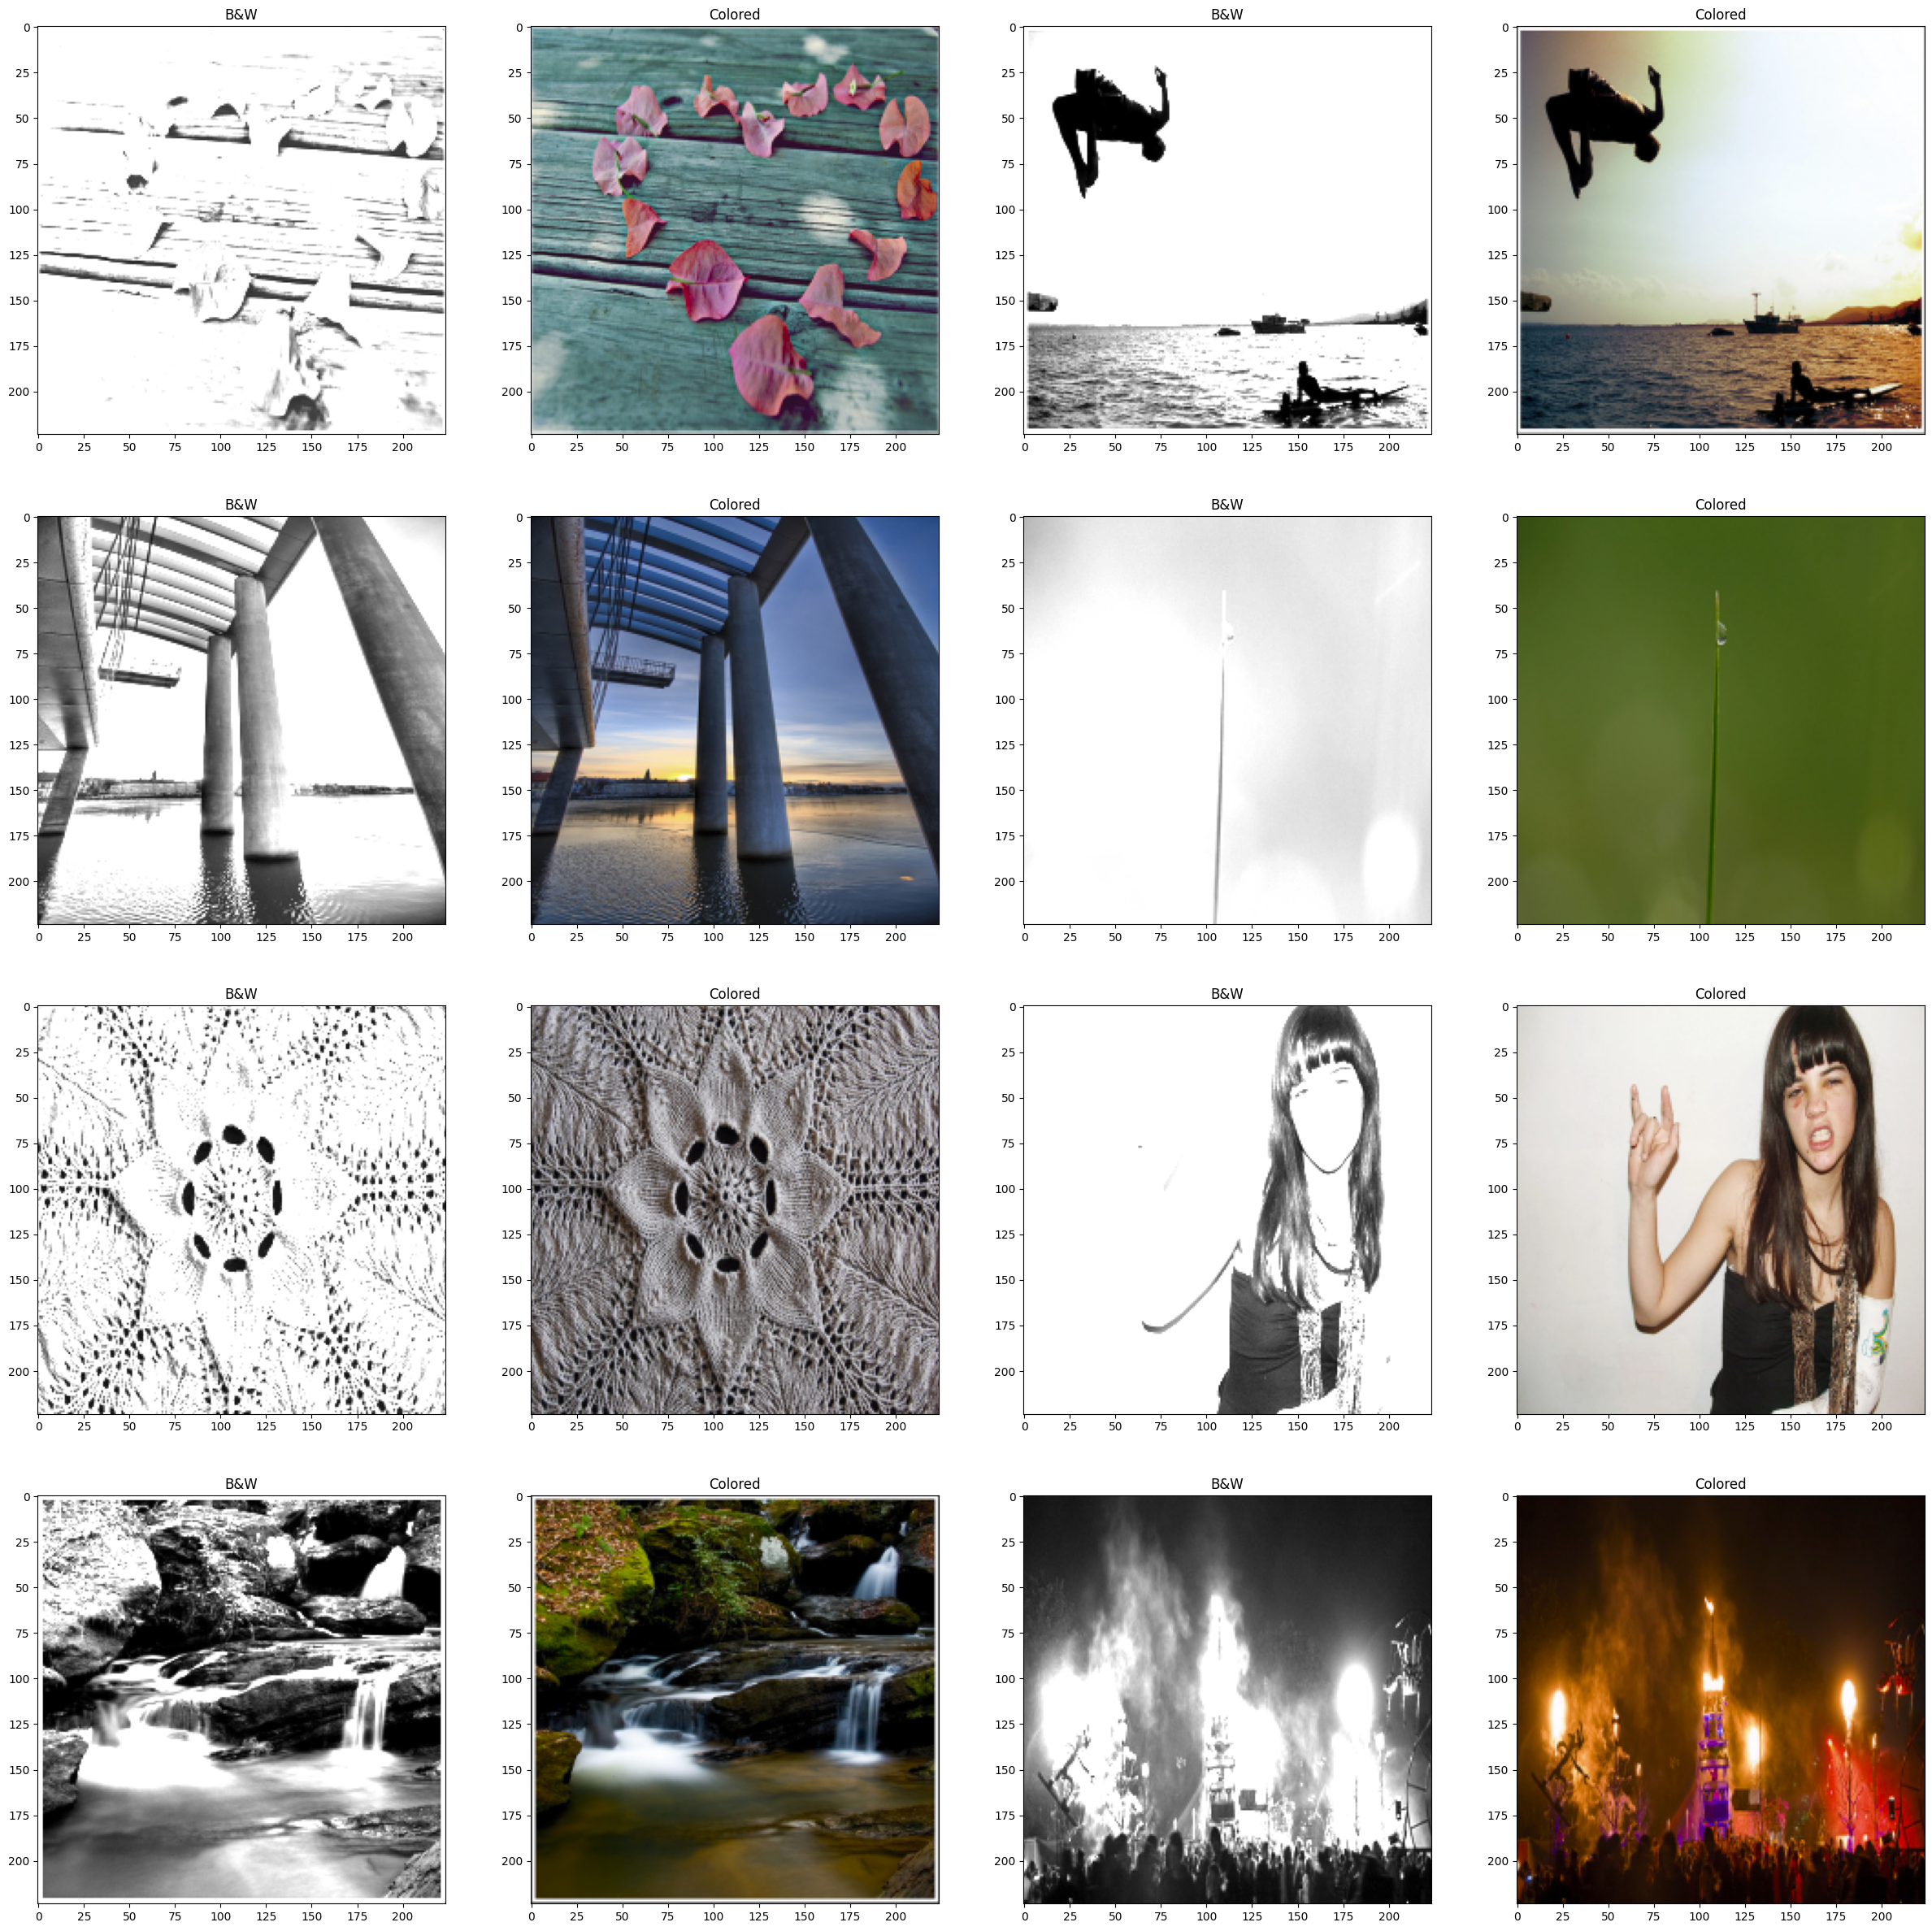

In [10]:
plt.figure(figsize=(30,30))
for i in range(1,16,2):
    plt.subplot(4,4,i)
    img = np.zeros((224,224,3))
    img[:,:,0] = L_data[i]
    plt.title('B&W')
    plt.imshow(lab2rgb(img))
    
    plt.subplot(4,4,i+1)
    img[:,:,1:] = ab_data[i]
    img = img.astype('uint8')
    img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
    plt.title('Colored')
    plt.imshow(img)